Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv
Dataset Loaded Successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic           

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 64)          │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,721 (135.63 KB)

 Trainable params: 34,721 (135.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6605 - loss: 0.6390 - val_accuracy: 0.7265 - val_loss: 0.5867
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7459 - loss: 0.5711 - val_accuracy: 0.7265 - val_loss: 0.5859
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7404 - loss: 0.5703 - val_accuracy: 0.7265 - val_loss: 0.5872
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7465 - loss: 0.5613 - val_accuracy: 0.7265 - val_loss: 0.5839
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7372 - loss: 0.5749 - val_accuracy: 0.7265 - val_loss: 0.5846
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7359 - loss: 0.5739 - val_accuracy: 0.7265 - val_loss: 0.5848
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7453 - loss: 0.5578 - val_accuracy: 0.7265 - val_loss: 0.5842
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7334 - loss: 0.5682 - val_accuracy:

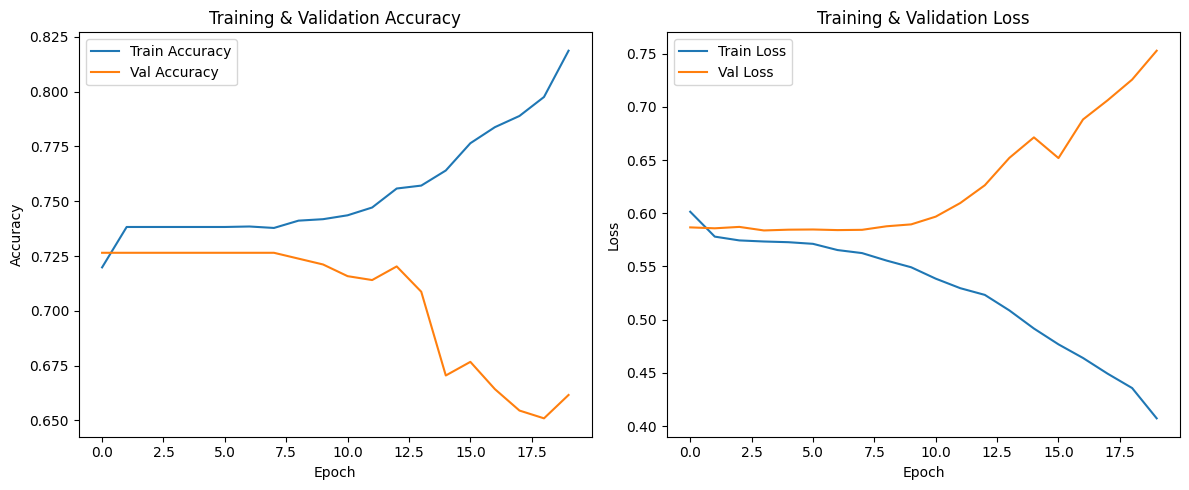

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.7489
Test Accuracy: 0.6789772510528564
Test Loss: 0.7899217009544373
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Sample Predictions: [0 0 0 0 0 1 0 1 0 0]
Actual Values: [0 1 0 1 0 1 0 0 1 1]


In [2]:
# -----------------------------------------------------------
# CUSTOMER CHURN PREDICTION USING RNN (LSTM)
# CLEAN COLAB CODE WITH GRAPHS
# -----------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# -----------------------------------------------------------
# STEP 1: Upload & Load Dataset
# -----------------------------------------------------------
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded.keys())))
print("Dataset Loaded Successfully!")
print(df.head())

# -----------------------------------------------------------
# STEP 2: Encode Categorical Columns
# -----------------------------------------------------------
data = df.copy()
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# -----------------------------------------------------------
# STEP 3: Split Features & Target
# -----------------------------------------------------------
X = data.drop('Churn', axis=1).values  # adjust if target name is different
y = data['Churn'].values

# -----------------------------------------------------------
# STEP 4: Scale Features
# -----------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------------------------------------
# STEP 5: Convert Data into Sequences for LSTM
# -----------------------------------------------------------
def create_sequences(X, y, timesteps=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i+timesteps])
        y_seq.append(y[i+timesteps])
    return np.array(X_seq), np.array(y_seq)

TIMESTEPS = 5
X_seq, y_seq = create_sequences(X_scaled, y, TIMESTEPS)
print("Sequence Shape:", X_seq.shape)

# -----------------------------------------------------------
# STEP 6: Train/Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False
)

# -----------------------------------------------------------
# STEP 7: Build LSTM Model
# -----------------------------------------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIMESTEPS, X_train.shape[2])),
    Dropout(0.3),

    LSTM(32),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------------------------------------
# STEP 8: Train Model
# -----------------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# -----------------------------------------------------------
# STEP 9: Plot Accuracy & Loss Graphs
# -----------------------------------------------------------
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# STEP 10: Evaluate Model
# -----------------------------------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

# -----------------------------------------------------------
# STEP 11: Predictions
# -----------------------------------------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Sample Predictions:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10])
